NCR 709
Bangalore 637
Mumbai 449


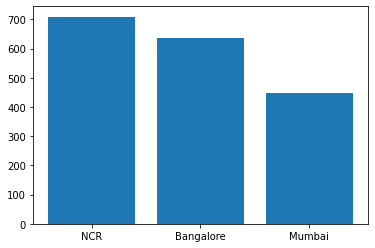

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("Datasets//startup_funding.csv", encoding='ISO-8859-1', index_col = 0)
df = data.copy()

cities = df.loc[:, 'CityLocation']
cities.dropna(inplace=True)
cities = cities.str.split('/')
cities = cities.explode()
cities = cities.str.strip()

changes = {'^Delhi':'New Delhi', 'bangalore':'Bangalore'}
cities.replace(changes, regex=True, inplace=True)
changes = {'Gurgaon':'NCR', 'Noida':'NCR', 'New Delhi':'NCR'}
cities.replace(changes, inplace=True)
cities = cities[cities.isin(['Bangalore', 'Mumbai', 'NCR'])]


fundings = cities.value_counts().reset_index()
fundings.rename(columns={'index':'CityLocation', 'CityLocation':'Count'}, inplace=True)

for index, row in fundings.iterrows():
    print(row['CityLocation'], row['Count'])
plt.bar(fundings.loc[:, 'CityLocation'],  fundings.loc[:, 'Count'])
plt.show()

# 2

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("Datasets//startup_funding.csv", encoding='ISO-8859-1', index_col = 0)
df = data.copy()
investors = df.loc[:, 'InvestorsName']

investors.dropna(inplace=True)
investors = investors.str.split(',').explode()
investors = investors.replace('\.$', '', regex=True).str.strip().str.title()
investors = investors[~investors.str.contains('Undisclosed')]

investors = investors.value_counts().reset_index()
investors.rename(columns={'index':'InvestorsName', 'InvestorsName':'Count'}, inplace=True)

for index, row in investors[0:5].iterrows():
    print(row['InvestorsName'], row['Count'])

Sequoia Capital 65
Accel Partners 52
Saif Partners 44
Kalaari Capital 44
Blume Ventures 41


# 3

In [142]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = pd.read_csv("Datasets//startup_funding.csv", encoding='ISO-8859-1', index_col = 0)
df = data.copy()
df_staged = df.loc[:, ['InvestorsName', 'StartupName']]

df_staged.dropna(inplace=True)
df_staged['InvestorsName'] = df_staged['InvestorsName'].str.split(',')
df_staged = df_staged.explode('InvestorsName')
df_staged['InvestorsName'] = df_staged['InvestorsName'].replace('\.$', '', regex=True).str.strip().str.title()
df_staged = df_staged[~df_staged['InvestorsName'].str.contains('Undisclosed')]
changes = {'Oyo Rooms':'Oyo', 'OyoRooms':'Oyo','OYO Rooms':'Oyo','Oyorooms':'Oyo', 'Olacabs':'Ola', 'Ola Cabs':'Ola','Paytm Marketplace':'Paytm','Flipkart.com':'Flipkart'}
df_staged['StartupName'].replace(changes, inplace = True)
df_staged['InvestorsName'].replace(r'^\s*$', np.nan, regex=True, inplace=True)
df_staged['InvestorsName'].dropna(inplace=True)

investors = df_staged.value_counts().reset_index(name='Count')
investors = investors['InvestorsName']
investors = investors.value_counts().reset_index(name='Count')
investors.rename(columns={'index':'InvestorsName'}, inplace = True)
investors.head(5)

TypeError: bad operand type for unary ~: 'float'

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def lista(l):
    return [i.strip() for i in l.split(',')]

data = pd.read_csv("Datasets//startup_funding.csv", encoding='ISO-8859-1', index_col = 0)
df = data.copy()
df.dropna(subset=['InvestorsName'], inplace=True)
df = df[~df['InvestorsName'].str.startswith('Undisclosed')]
changes = {'Oyo Rooms':'Oyo', 'OyoRooms':'Oyo','OYO Rooms':'Oyo','Oyorooms':'Oyo', 'Olacabs':'Ola', 'Ola Cabs':'Ola','Paytm Marketplace':'Paytm','Flipkart.com':'Flipkart'}
df['StartupName'].replace(changes, inplace = True)
df['InvestorsName'] = df['InvestorsName'].apply(lista)

exploded = df.explode('InvestorsName')
exploded['InvestorsName'] = exploded['InvestorsName'].replace(r'^\s*$', np.nan, regex=True)
exploded.dropna(subset=['InvestorsName'], inplace=True)

grouped = exploded.groupby(['InvestorsName','StartupName']).size().reset_index(name ='Size')
grouped = grouped.sort_values('Size', ascending=False)
investors = grouped['InvestorsName']
investors.value_counts()[0:5]